<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/ISLR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [0]:
pd.set_option('display.notebook_repr_html', False)

In [0]:
%matplotlib inline
plt.style.use('seaborn-white')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/My Drive/ISLR")
%ls

Advertising.csv  Credit.csv  ISLR_3.ipynb


In [6]:
adv = pd.read_csv("Advertising.csv")
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [0]:
#credit = pd.read_csv()

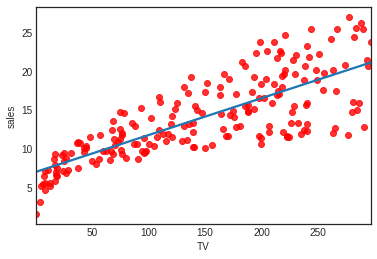

In [8]:
sns.regplot(adv['TV'], adv['sales'], order =1, ci=None, scatter_kws={'color':'r'})

In [9]:
regr = skl_lm.LinearRegression()
x = scale(adv.TV, with_mean=True, with_std=False).reshape(-1,1)
y = adv.sales
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(regr.intercept_, regr.coef_)

14.0225 [0.04753664]


In [0]:
b0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50) #np.linspace = numpy.linspace : linear spaced
b1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(b0,b1, indexing='xy') #meshgrid : 직사각형 격자 만들기
z = np.zeros((b1.size, b0.size))

In [0]:
for (i,j),v in np.ndenumerate(z):
  z[i,j] = ((y - (xx[i,j]+x.ravel()+yy[i,j]))**2).sum()/1000

In [0]:
#min_RSS = r : ??????

AttributeError: ignored

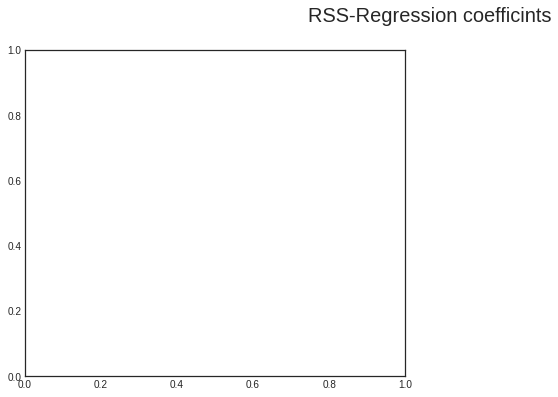

In [14]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS-Regression coefficints', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, progection='3d')
CS = ax1.contour(xx, yy, z, cmp=plt.cm.Set1, levels= [2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regt.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=TRUE, fontsize = 10, fmt='%1.1f')

ax2.plot_surface(xx,yy,z,rstride=3, cstride=3,alpha=0.3)
ax2.contour(xx,yy,z,zdir='z', offset=z.min(), cmap=plt.cm.Set1, alpha=0.4, levels=[2.15,2.2,2.3,2.5,3])
ax2.scatter3D(regt.intercept_,regr.coef_[0], min_rss,c='r',label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlimg(Z.min(), Z.max())
ax2.set_ylim(0.02,0.07)

for ax in fig.axes :
  ax.set_xlabel(r'$\beta_0$', fontsize=17)
  ax.set_ylabel(r'$\beta_1$', fontsize=17)
  ax.set_yticks([0.03, 0.04, 0.05, 0.06])
  ax.legend()

In [15]:
est = smf.ols('sales ~ TV', adv).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [0]:
regr = skl_lm.LinearRegression()

In [16]:
X = adv.TV.values.reshape(-1,1)
Y = adv.sales

regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#sales_pred = regr.predict(X)
print(adv)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [24]:
est2 = smf.ols('sales ~ radio',adv).fit()
est2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [26]:
est3 = smf.ols('sales~newspaper', adv).fit()
est3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [28]:
est4 = smf.ols('sales ~ TV + radio + newspaper', adv).fit()
est4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.58e-96
Time:                        00:26:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
est4.summary().tables[0]#summary 는 3등분으로 구성되어있다

Dep. Variable:,sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Thu, 21 May 2020",Prob (F-statistic):,1.58e-96
Time:,00:26:33,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


In [30]:
adv.corr() #correlation matrix

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000

In [0]:
regr = skl_lm.LinearRegression()
#X = adv[['radio','TV']].as_matrix() as_matrix 가 없어?
X = adv[['radio', 'TV']]
Y = adv.sales

In [37]:
radio = np.arange(0,50)
tv = np.arange(300)

b1,b2 = np.meshgrid(radio,tv,indexing = 'xy')
z = np.zeros((tv.size, radio.size))

for(i,j),v in np.ndenumerate(z):
  z[i,j] = (regr.fit_intercept + b1[i,j]*regr.coef_[0] + b2[i,j]*regr.coef_[1]) #coef 가 없대

AttributeError: ignored

In [43]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression : sales ~ radio + tv advertising', fontsize = 20)

#ax = axe3d.Axes3D(fig)

ax.plot_surface(b1,b2,z, rstride=10, cstride=5, zorder=-1)

for i in np.arange(200):
  ax.plot([adv.radio[i]]*2, [adv.tv[i]]*2,[adv.sales[i],0], c='k',alpha=0.8, zorder=0)
ax.scatter(adv.radio, adv.tv, adv.sales), c='r', zorder=1)

ax.set_xlabel('radio')
ax.set_xlim(0.50)
ax.set_ylable('tv')
ax.set_ylim(ymin=0)
ax.setzlabel('sales')


NameError: ignored

<Figure size 720x432 with 0 Axes>

In [46]:
credit = pd.read_csv('Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No' : 0,'yes' : 1})
credit.head(3)

    Income  Limit  Rating  Cards  ...  Married  Ethnicity Balance Student2
0   14.891   3606     283      2  ...      Yes  Caucasian     333      0.0
1  106.025   6645     483      3  ...      Yes      Asian     903      NaN
2  104.593   7075     514      4  ...       No      Asian     580      0.0

[3 rows x 12 columns]

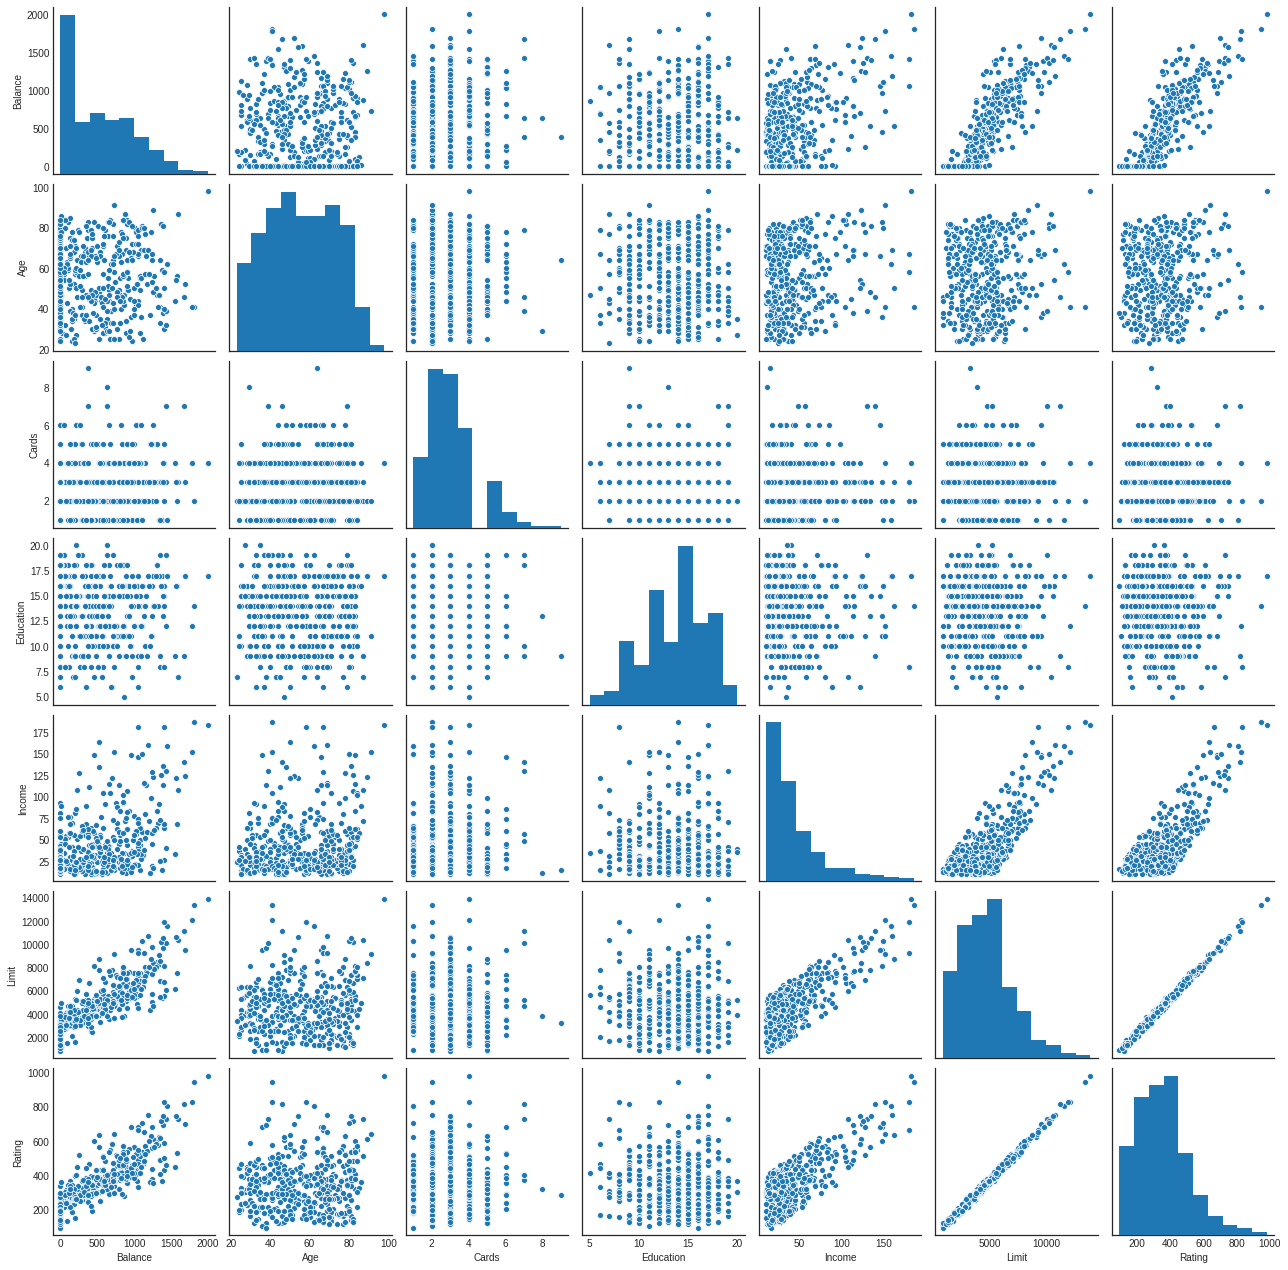

In [48]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

In [49]:
est11 = smf.ols('Balance ~ Gender', credit).fit()
est11.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,529.5362,31.988,16.554,0.000,466.649,592.423
Gender[T.Male],-19.7331,46.051,-0.429,0.669,-110.267,70.801


In [52]:
est12 = smf.ols('Balance ~ Ethnicity', credit).fit()
est12.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


In [55]:
print(adv)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [56]:
est13 = smf.ols('sales ~ TV + radio + TV*radio', adv).fit()
est13.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [67]:
est111 = smf.ols('Balance ~ Income + Student2', credit).fit()
est111.summary().tables[1]

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,200.6232,32.921,6.094,0.000,135.881,265.366
Income,6.2182,0.578,10.750,0.000,5.081,7.356
Student2,0,0,nan,nan,0,0


In [0]:
est112 = smf.ols('Balance ~ Income + Student2 + Income*Student2', credit).fit()

In [70]:
income = np.linspace(0,150)

#st1 = np.linspace(regr['intercept']+regr['Student2'], regr['intercept'] + regr['Student2'] + 150*regr['Income']))

SyntaxError: ignored

In [71]:
st2 = np.linspace(regr['Intercept'])

TypeError: ignored

In [0]:
#non linear 비선형

In [73]:
auto['horsepower2'] = auto.horsepower **2

NameError: ignored

In [0]:
regr = skl_lm.LinearRegression()

X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

X2 = auto[['horsepower', 'horsepower2']].as_marix()
regr.fit(X2,y)

auto['pred2'] = regr.predict(X2)

In [76]:
sns.regplot(auto, pred1, auto.resid1, lowess=True,
            ax=ax1, line_kws={'color':'r', 'lw':1})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax = ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

NameError: ignored

In [0]:
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws = {'color':'r', 'lw':1 }, ax=ax2)
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax = ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes :
  ax.set_xlabels('FItted Values')
  ax.set_ylabels('Residuals')


In [0]:
fig(ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('AGE')

for ax in fig.axes :
  ax.set_xlabel('limit')
  ax.set_xticks([2000,4000,8000,12000])

In [0]:
y = credit.Balance
x = credit[['age', 'limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(x.astype('float'), with_std=False),y)
print('Age/Limit\n', regr1.intercept_)
print(regr1.coef_)

In [0]:
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] = ((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000

for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] = ((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

In [0]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'

# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

In [0]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))